In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(os.curdir))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


['.git', 'bulk_test.json', 'data_values.csv', 'data_values_good.csv', 'dtree_dl.ipynb', 'KNN_dl.ipynb', 'labels.csv', 'labels_good.csv', 'putLabels.py', 'XGBoost_dl.ipynb']


In [62]:
labels = pd.read_csv("labels_good.csv")
labels = labels.set_index('rider_provider')
labels['aggregate'] = labels[['wce_label','eps_label','de_label','pe_label','roe_label','growth_rate_label','profitm_label','grossm_label','ro40_label','churnrate_label','EVbyEbidta_label','marketCap_label','magicNum_label']].sum(axis = 1, skipna = True)

In [63]:
avg_labels = labels.mean(axis = 0, skipna = True).fillna(0).to_dict()
for key in labels.keys():
  labels[key] = labels[key].fillna(avg_labels[key])


In [64]:
# removed all Nan above

In [65]:

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [66]:
labels['aggregate'] = labels['aggregate'].astype(int)
X = labels[['GrossProfit','GrossMargin','WorkingCapitalRatio','EarningPerShare','DebtToEquityRatio','PEratio','ReturnOfEquity','EBIDTAratio','EvRatio','EVbyEbidta','ChurnRate','GrowthRate','ProfitMargin','RuleOf40','MarketCap','MagicNumber']]
y = labels['aggregate']


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
np.unique(labels['aggregate'].to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [69]:
classes = len(np.unique(y_train.to_numpy()))

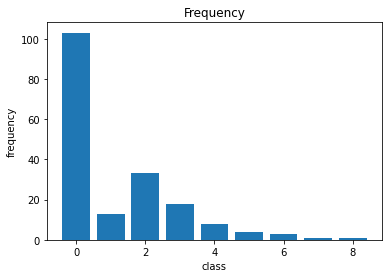

In [70]:
count = {}
for x,y in zip(X_train.to_numpy(), y_train.to_numpy()):
  if y not in count:
    count[y] = 0
  count[y] += 1

x = list(count.keys())
y = list(count.values())

plt.bar(x, y)                # plot the points in the array a
plt.title("Frequency")  # Add a title to the figure
plt.xlabel("class")    # Give a label to the x-axis
plt.ylabel("frequency");    # Give a label to the y-axis

In [71]:
xgb_classifier = XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000, 
                        num_classes=classes)

xgb_classifier.fit(X_train, y_train)  
xgb_predictions = xgb_classifier.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)

C:\Users\krishanu\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "num_classes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
import seaborn as sn
rang = "ABCDEFGHIJKLMNOP"[:cm.shape[0]]
print(classes)
df_cm = pd.DataFrame(cm, index = [i for i in rang],
                  columns = [i for i in rang])

9


<AxesSubplot:>

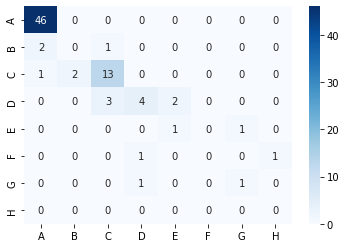

In [73]:
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print(accuracy_score(y_test, xgb_predictions))

0.8125
